In [1]:
import numpy as np
import os
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import graphviz
import glob
#from sklearn.metrics import mean_squared_error

In [8]:
df1 = pd.read_csv("https://raw.githubusercontent.com/michellegarcia2000/p-rotein/main/all_data_1.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/michellegarcia2000/p-rotein/main/all_data_2.csv")
data = pd.concat([df1,df2])

In [9]:
#data = pd.read_csv("https://github.com/michellegarcia2000/p-rotein/blob/main/all_data_Char.csv?raw=true")
data.keys()

Index(['sequence', 'seq_len', 'molecular_weight', 'hydrophobicity',
       'instability_index', 'aromaticity', 'A %', 'C %', 'D %', 'E %', 'F %',
       'G %', 'H %', 'I %', 'K %', 'L %', 'M %', 'N %', 'P %', 'Q %', 'R %',
       'S %', 'T %', 'V %', 'W %', 'Y %', 'label'],
      dtype='object')

In [10]:
print(data.seq_len.shape)
data.dtypes

(256797,)


sequence              object
seq_len                int64
molecular_weight     float64
hydrophobicity       float64
instability_index    float64
aromaticity          float64
A %                  float64
C %                  float64
D %                  float64
E %                  float64
F %                  float64
G %                  float64
H %                  float64
I %                  float64
K %                  float64
L %                  float64
M %                  float64
N %                  float64
P %                  float64
Q %                  float64
R %                  float64
S %                  float64
T %                  float64
V %                  float64
W %                  float64
Y %                  float64
label                  int64
dtype: object

In [11]:
X, y = data.iloc[:,1:-1],data.iloc[:,-1]
#print(data.iloc[:,-1])
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [13]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [14]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[20:36:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [15]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.268960


In [16]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[20:36:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:36:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:36:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [17]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.460113,0.000044,0.460123,0.000017
1,0.425063,0.000053,0.425138,0.000056
2,0.394709,0.000267,0.394810,0.000159
3,0.368021,0.000243,0.368190,0.000143
4,0.344723,0.000494,0.344933,0.000468


In [18]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.207173
Name: test-rmse-mean, dtype: float64


In [19]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[20:36:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


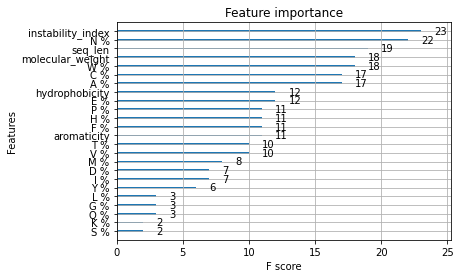

In [20]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()